
<a href="https://colab.research.google.com/github/kokchun/Machine-learning-AI22/blob/main/Exercises/E02_sklearn.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Scikit-learn exercises 

---
These are introductory exercises in Machine learning with focus in **scikit-learn** .

<p class = "alert alert-info" role="alert"><b>Note</b> that sometimes you don't get exactly the same answer as I get, but it doesn't neccessarily mean it is wrong. Could be some parameters, randomization, that we have different. Also very important is that in the future there won't be any answer sheets, use your skills in data analysis, mathematics and statistics to back up your work.</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. EDA (*)

In the whole exercise, we will work with the "mpg" dataset from seaborn dataset. Start by loading dataset "mpg" from the ```load_dataset``` method in seaborn module. The goal will be to use linear regression to predict mpg - miles per gallon. 

&nbsp; a) Start by doing some initial EDA such as info(), describe() and figure out what you want to do with the missing values.

&nbsp; b) Use describe only on those columns that are relevant to get statistical information from. 

&nbsp; c) Make some plots on some of the columns that you find interesting.

&nbsp; d) Check if there are any columns you might want to drop. 

<details>

<summary>Answer</summary>

a) I have chosen to drop the rows, but it doesn't neccessary have to be the best method. Maybe some NaNs should be filled somehow?

b)
|      |      mpg |   cylinders |   displacement |   horsepower |   weight |   acceleration |
|:-----|---------:|------------:|---------------:|-------------:|---------:|---------------:|
| mean | 23.4459  |     5.47194 |        194.412 |     104.469  | 2977.58  |       15.5413  |
| std  |  7.80501 |     1.70578 |        104.644 |      38.4912 |  849.403 |        2.75886 |
| min  |  9       |     3       |         68     |      46      | 1613     |        8       |
| 25%  | 17       |     4       |        105     |      75      | 2225.25  |       13.775   |
| 50%  | 22.75    |     4       |        151     |      93.5    | 2803.5   |       15.5     |
| 75%  | 29       |     8       |        275.75  |     126      | 3614.75  |       17.025   |
| max  | 46.6     |     8       |        455     |     230      | 5140     |       24.8     |


c) Here are some example plots

<img src="../assets/EDA_mpg.png" height="400"/>

d) I have chosen to drop the columns origin and name. Think yourself if it is reasonable and feel free to experiment. Also there might be some domain experts in our class, that you can ask. 

</details>

---

In [2]:
import seaborn as sns
df = sns.load_dataset("mpg")
nulls = df[df.isnull().any(axis=1)]
df = df.drop(index=nulls.index).reset_index(drop=True)
#Removed nans

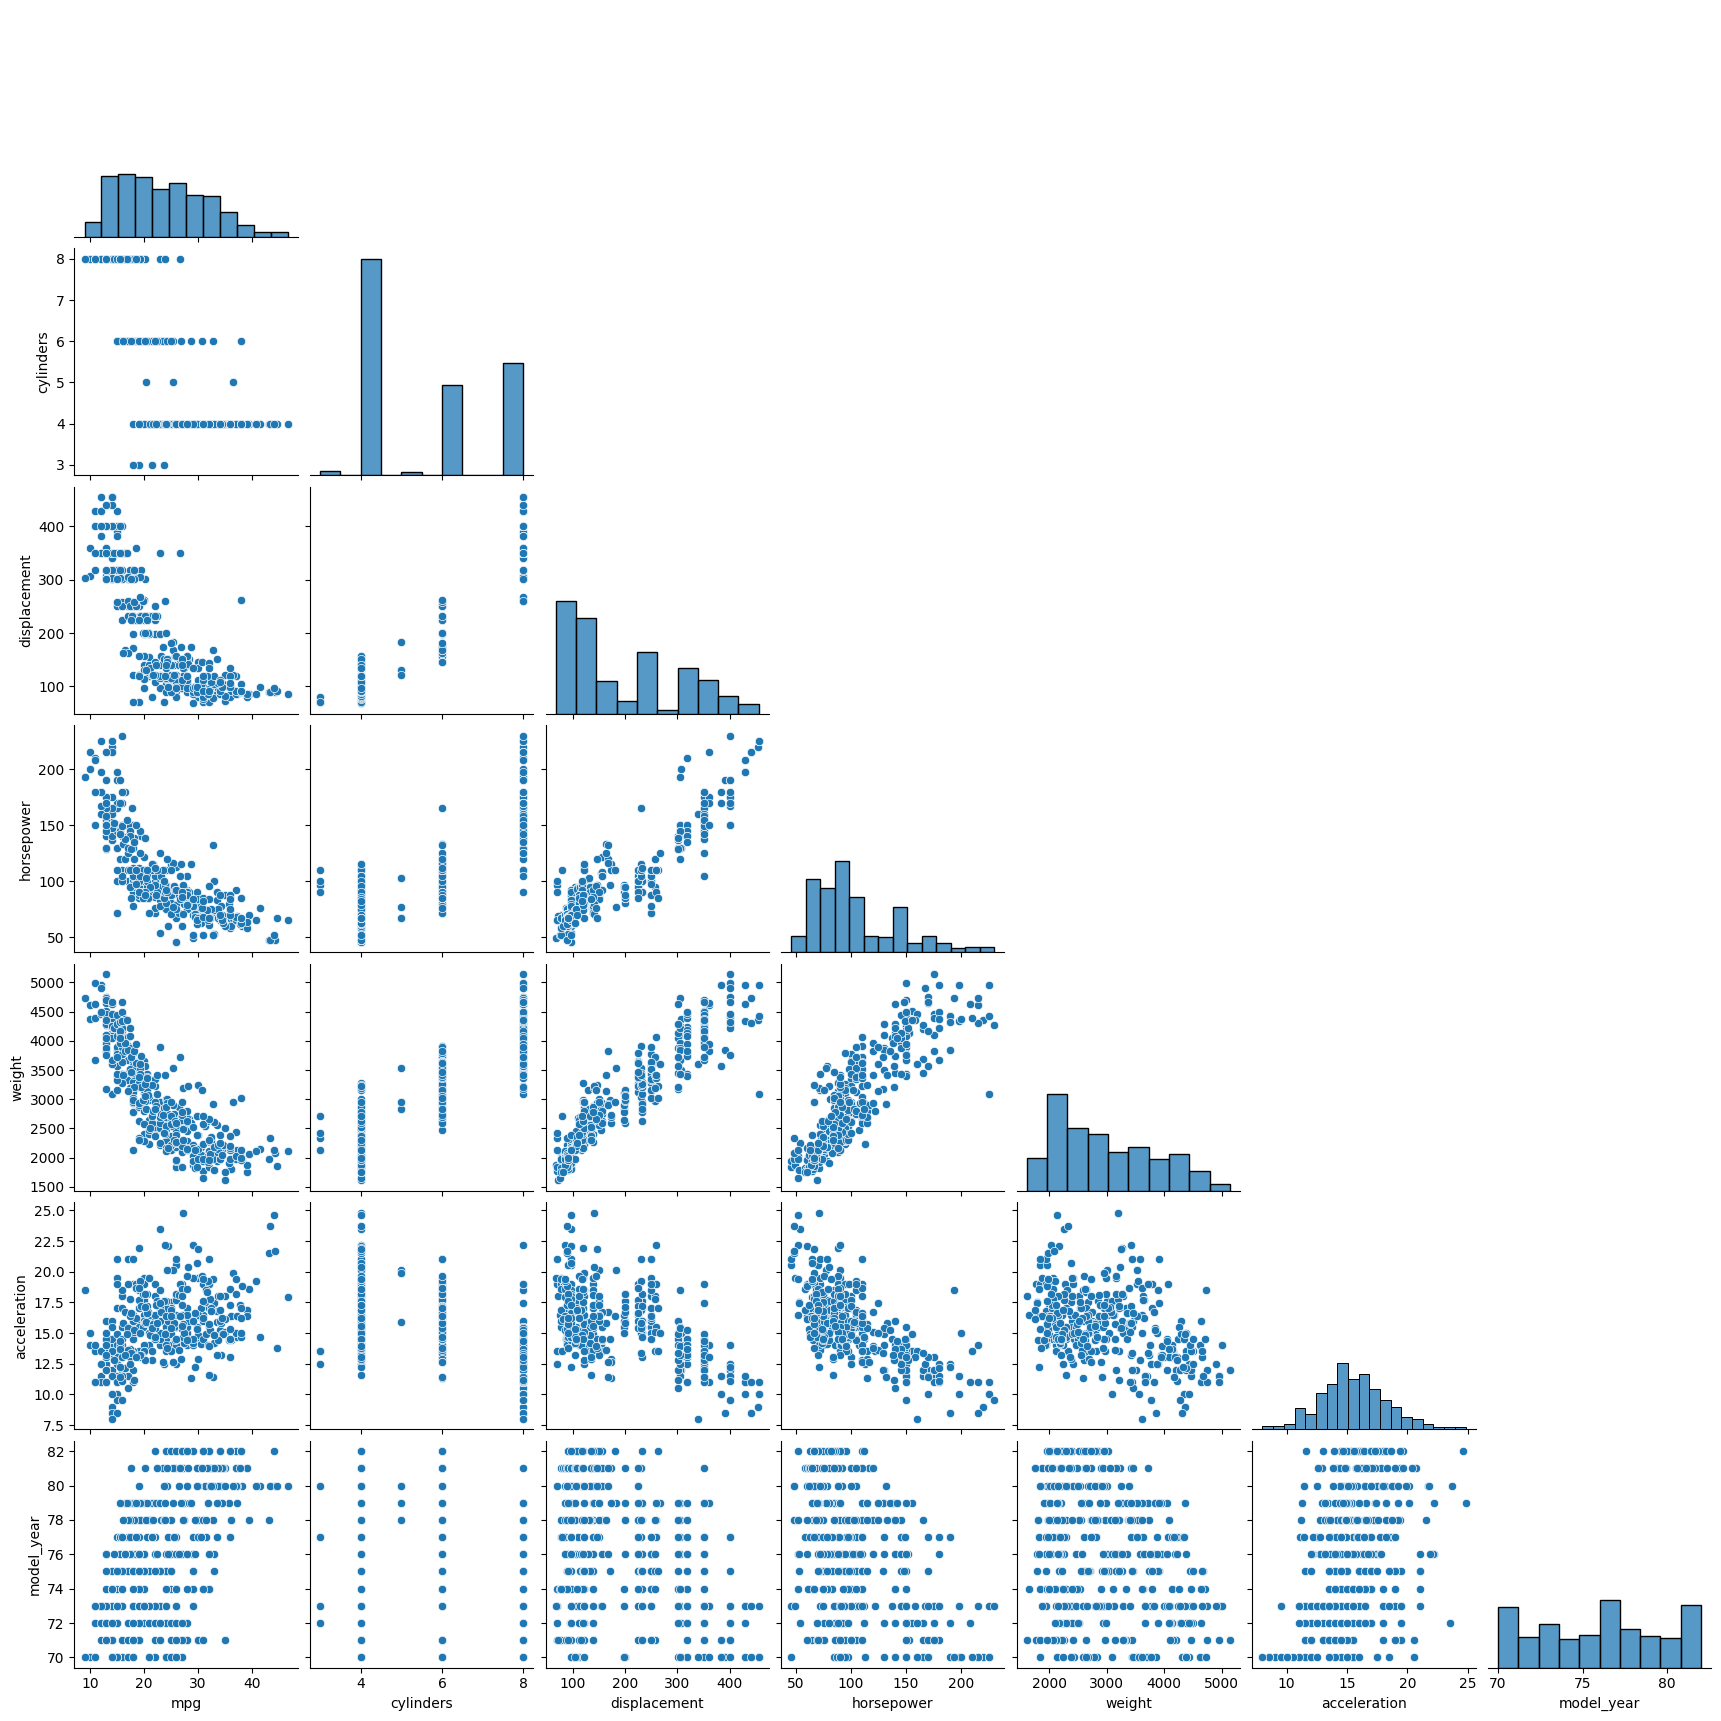

In [3]:
sns.pairplot(df, corner=True)

In [4]:
from regressionclass import LinearRegression as LR
import pandas as pd
nostrings = df.drop(['name','origin'], axis=1)
stats = LR(nostrings, nostrings['mpg'])
print(stats.Pearson_pairs)
print(stats.T_test_all)

mpg/cylinders : PearsonRResult(statistic=np.float64(-0.7776175081260223), pvalue=np.float64(1.3113836370989314e-80))
mpg/displacement : PearsonRResult(statistic=np.float64(-0.8051269467104578), pvalue=np.float64(1.6606418277978903e-90))
mpg/horsepower : PearsonRResult(statistic=np.float64(-0.778426783897776), pvalue=np.float64(7.031989029403902e-81))
mpg/weight : PearsonRResult(statistic=np.float64(-0.8322442148315752), pvalue=np.float64(6.0152960514372035e-102))
mpg/acceleration : PearsonRResult(statistic=np.float64(0.42332853690278727), pvalue=np.float64(1.7785761248041882e-18))
mpg/model_year : PearsonRResult(statistic=np.float64(0.5805409660907855), pvalue=np.float64(1.0757935564158177e-36))
cylinders/displacement : PearsonRResult(statistic=np.float64(0.9508233008277827), pvalue=np.float64(1.2986356222472234e-200))
cylinders/horsepower : PearsonRResult(statistic=np.float64(0.8429833569186564), pvalue=np.float64(4.6338840301616405e-107))
cylinders/weight : PearsonRResult(statistic=n

## 1. Train|test split (*)

We want to predict the "mpg", split up X and y, and perform train|test split using scikit-learn. Choose test_size of 0.2 and random_state 42. Control the shapes of each X_train, X_test, y_train, y_test.  

<details>

<summary>Answer</summary>

Do a manual calculation to check against the shapes after train|test split. 

</details>

---

In [5]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(
    nostrings.drop('mpg',axis=1), df['mpg'], test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape
X_train


,bias,cylinders,displacement,horsepower,weight,acceleration,model_year
258,1.0,6,225.0,110.0,3620,18.7,78
182,1.0,4,140.0,92.0,2572,14.9,76
172,1.0,6,171.0,97.0,2984,14.5,75
63,1.0,8,318.0,150.0,4135,13.5,72
340,1.0,4,86.0,64.0,1875,16.4,81
...,...,...,...,...,...,...,...
71,1.0,8,304.0,150.0,3892,12.5,72
106,1.0,6,232.0,100.0,2789,15.0,73
270,1.0,4,151.0,85.0,2855,17.6,78
348,1.0,4,98.0,65.0,2380,20.7,81


## 2. Function for evaluation (*)

Create a function for training a regression model, predicting and computing the metrics MAE, MSE, RMSE. It should take in parameters of X_train, X_test, y_train, y_test, model. Now create a linear regression model using scikit-learns ```LinearRegression()``` (OLS normal equation with SVD) and call your function to get metrics. 

<details>

<summary>Answer</summary>

MAE 2.50

MSE 10.50

RMSE 3.24

</details>

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
reg = LR(X_train,y_train)
print(f"train score: MAE:{reg.MAE} MSE {reg.MSE} RMSE {reg.RMSE} R2 {reg.R2}")
b = np.array(reg.B).reshape(-1,1)
y_hat =  X_test @ b
MSE = mean_squared_error(y_test, y_hat)
MAE = mean_absolute_error(y_test, y_hat)
RMSE = float(np.sqrt(MSE))
R2 = r2_score(y_test, y_hat)
print(f"test score: MAE:{MAE} MSE {MSE} RMSE {RMSE} R2 {R2}")



train score: MAE:2.6691759304861007 MSE 11.943343161136761 RMSE 3.4559142294242142 R2 0.8107227953093896
test score: MAE:2.503860089787663 MSE 10.50237032944132 RMSE 3.240736078337963 R2 0.7942349075423885


---
## 3. Compare models (*)

Create the following models 
- Linear regression (SVD)
- Linear regression (SVD) with scaled data (feature standardization)
- Polynomial linear regression with degree 1
- Polynomial linear regression with degree 2
- Polynomial linear regression with degree 3

Make a DataFrame with evaluation metrics and model. Which model performed overall best?

<details>

<summary>Answer</summary>

|      |   Linear regr. SVD |   Linear regr. SVD scaled |   Linear regr. SGD |   Polynom. regr. deg 1 |   Polynom. regr. deg 2 |   Polynom. regr. deg 3 |
|:-----|-------------------:|--------------------------:|-------------------:|-----------------------:|-----------------------:|-----------------------:|
| mae  |            2.50386 |                   2.50386 |            2.53515 |                2.50386 |                1.98048 |                2.11788 |
| mse  |           10.5024  |                  10.5024  |           10.8908  |               10.5024  |                7.41986 |                9.27353 |
| rmse |            3.24074 |                   3.24074 |            3.30012 |                3.24074 |                2.72394 |                3.04525 |

</details>

---

In [69]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = tts(
    nostrings.drop('mpg',axis=1), df['mpg'], test_size=0.2, random_state=42)
model = LinearRegression().fit(X_train, y_train)
print(f"R2: {model.score(X_train,y_train)}")
y_hat = model.predict(X_test)
MSE = mean_squared_error(y_test, y_hat)
MAE = mean_absolute_error(y_test, y_hat)
RMSE = float(np.sqrt(MSE))
R2 = r2_score(y_test, y_hat)
print(f"test score: MAE:{MAE} MSE {MSE} RMSE {RMSE} R2 {R2}")


R2: 0.8107227953093896
test score: MAE:2.5038600897761305 MSE 10.502370329417333 RMSE 3.2407360783342622 R2 0.7942349075428585


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
reg = LR(X_train,y_train)
print(f"train score: MAE:{reg.MAE} MSE {reg.MSE} RMSE {reg.RMSE} R2 {reg.R2}")
b = np.array(reg.B).reshape(-1,1)
y_hat =  X_test @ b
MSE = mean_squared_error(y_test, y_hat)
MAE = mean_absolute_error(y_test, y_hat)
RMSE = float(np.sqrt(MSE))
R2 = r2_score(y_test, y_hat)
print(f"test score: MAE:{MAE} MSE {MSE} RMSE {RMSE} R2 {R2}")



train score: MAE:2.6691759304861007 MSE 11.943343161136761 RMSE 3.4559142294242142 R2 0.8107227953093896
test score: MAE:2.503860089787663 MSE 10.50237032944132 RMSE 3.240736078337963 R2 0.7942349075423885


In [75]:
#Scaler
from sklearn.preprocessing import StandardScaler as ss

scaler = ss()
scaler.fit(nostrings)
scaler.mean_
scaler.transform(nostrings)

array([[ 0.        , -0.69863841,  1.48394702, ...,  0.62054034,
        -1.285258  , -1.62531533],
       [ 0.        , -1.08349824,  1.48394702, ...,  0.84333403,
        -1.46672362, -1.62531533],
       [ 0.        , -0.69863841,  1.48394702, ...,  0.54038176,
        -1.64818924, -1.62531533],
       ...,
       [ 0.        ,  1.09737414, -0.86401356, ..., -0.80463202,
        -1.4304305 ,  1.63640964],
       [ 0.        ,  0.5842277 , -0.86401356, ..., -0.41562716,
         1.11008813,  1.63640964],
       [ 0.        ,  0.96908753, -0.86401356, ..., -0.30364091,
         1.40043312,  1.63640964]], shape=(392, 8))


## 4. Further explorations (**)

Feel free to further explore the dataset, for example you could choose to 
- drop different columns
- find out feature importance in polynomial models
- fine tune further for a specific model by exploring hyperparameters (check documentation which type of parameters that can be changed)

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---